In [1]:
%matplotlib inline

# Cartopy in a nutshell

## Course aims and objectives

The **aim** of the cartopy course is to introduce the cartopy library and raise awareness of some of its features.

The **learning outcomes** of the cartopy course are as follows. By the end of the course, you will be able to:

* understand the functionality provided by the `cartopy.crs` module,
* explain the purpose and usage of the `projection` and `transform` keyword arguments, and
* add geolocated data, grid lines and Natural Earth features to a cartopy map.

## Introduction: maps and projections

Cartopy is a Python package that provides easy creation of maps, using matplotlib, for the analysis and visualisation of geospatial data.

In order to create a map with cartopy and matplotlib, we typically need to import pyplot from matplotlib and cartopy's crs (coordinate reference system) submodule. These are typically imported as follows:

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Cartopy's matplotlib interface is set up via the **`projection`** keyword when constructing a matplotlib `Axes` / `SubAxes` instance. The resulting axes instance has new methods, such as the **``coastlines()``** method, which are specific to drawing cartographic data:

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

A full list of Cartopy projections is available at http://scitools.org.uk/cartopy/docs/latest/crs/projections.html.

Let's compare the Plate Carree projection to another projection from the projection list; being the Miller projection. We'll do that by plotting two subplots next to each other at the same time:

In [ ]:
# Make sure the figure is a decent size when plotted.
fig = plt.figure(figsize=(14, 7))

# Upper plot.
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()

# Lower plot.
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Miller())
ax2.coastlines()

# Show both subplots on the same figure.
plt.show()

## Transforming data

To draw cartographic data, we use the standard matplotlib plotting routines with an additional **`transform`** keyword argument. The value of the `transform` argument should be the cartopy coordinate reference system *of the data being plotted*:

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.plot([-100, 50], [25, 25], linewidth=4, transform=ccrs.Geodetic())
plt.show()

Notice that unless we specify a map extent (we did so via the **``set_global``** method in this case) the map will zoom into the range of the plotted data.

## Adding features

We can add features from the [Natural Earth](http://www.naturalearthdata.com/) database to maps we produce. Natural Earth datasets are downloaded and cached when they are first used, so you need an internet connection to use them, and you may encounter warnings when you first download them.

We add features to maps via the [cartopy feature interface](http://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html).

For example, let's add political borders to a map:

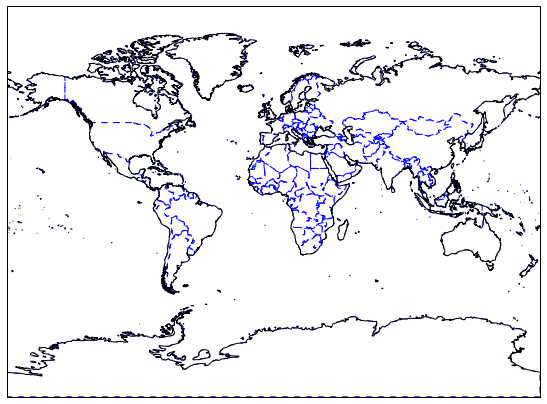

In [11]:
import cartopy.feature as cfeat

fig = plt.figure(figsize=(14, 7))

ax = plt.axes(projection=ccrs.Miller())
ax.coastlines('50m')

# ax.add_feature(cfeat.BORDERS, edgecolor='b')

political_bdrys = cfeat.NaturalEarthFeature(category='cultural',
                                            name='admin_0_countries',
                                            scale='50m')
ax.add_feature(political_bdrys,
               edgecolor='b', facecolor='none',
               linestyle='--', zorder=-1)

plt.show()

We can add graticule lines and tick labels to the map using the gridlines method (this currently is limited to just a few coordinate reference systems):

In [ ]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
plt.show()

We can control the specific tick values by using matplotlib's locator object, and the formatting can be controlled with matplotlib formatters:

In [ ]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LATITUDE_FORMATTER

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)

gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.yformatter = LATITUDE_FORMATTER

plt.show()

Cartopy cannot currently label all types of projection, though more work is intended on this functionality in the future.

## Exercise

The following snippet of code produces coordinate arrays and some data in a rotated pole coordinate system. The coordinate system for the `x` and `y` values, which is similar to that found in the some limited area models of Europe, has a projection "north pole" at 193.0 degrees longitude and 41.0 degrees latitude.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

x = np.linspace(337, 377, 25)
y = np.linspace(-18.7, 25.3, 35)
x2d, y2d = np.meshgrid(x, y)

data = np.cos(np.deg2rad(y2d) * 4) + np.sin(np.deg2rad(x2d) * 4)

**Part 1**

Define a cartopy coordinate reference system which represents a rotated pole with a pole latitude of 41.0 and a pole longitude of 193.0.

** Part 2**

Produce a map, with coastlines, using the coordinate reference system created in Part 1.

**Part 3**

Produce a map, with coastlines, in a Plate Carree projection with a pcolormesh of the data generated by the code snippet provided at the beginning of the exercise. Remember that the data is supplied in the rotated coordinate system defined in Part 1.